### Importing necessary libraries


In [2]:
import os 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math as m

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Mounting google drive
To access the content of google drive first we'll have to mount the drive to the google colab 

# New Section

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#### To Change path


In [4]:
import os
os.getcwd()
os.chdir('/content/drive')
os.getcwd()

'/content/drive'

#### To read the dataset from the google drive 

In [5]:
dataset=pd.read_csv('My Drive/adult1.csv')

### Have a look at dataset



In [6]:
dataset

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In the above dataset we can clearly see that its doesn't have column names so first we'll have to give the columns name to dataset that can be found from [Here](https://archive.ics.uci.edu/ml/datasets/Adult)   
 So lets put those columns name into dataset

In [7]:
columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary']
dataset.columns=columns
print(dataset.columns)
dataset

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Salary'],
      dtype='object')


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#### Does this dataset contain missing values 
Well when we explore the data we'll see that some columns from dataset have a   ' ?' in it that is used in place of nan values      

In [8]:
columns_list=dataset.columns.tolist()
for column in columns_list:
  print(dataset[column].unique())

[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[ 83311 215646 234721 ...  34066  84661 257302]
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' P

### So first we will replace it with np.nan


In [9]:
dataset.replace(to_replace=' ?',value=np.nan,inplace=True)

### Let's take a look at each column, its data type and value count in each column (excluding nan value)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       30724 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      30717 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  31977 non-null  object
 14  Salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Let's select  the columns that have missing values

In [11]:
list=[i for i in dataset.columns.tolist() if (dataset[i].isna().sum()!=0)]   # used to select the column name that have missing values
print(list)
print('............................................................')
missing_val_col=dataset[list]                                           # selecting columns with missing values from dataset
print(missing_val_col.dtypes)
print('..............................................................')
print(missing_val_col.isna().sum())                                     # To print the count of missing values in each column

['workclass', 'occupation', 'native-country']
............................................................
workclass         object
occupation        object
native-country    object
dtype: object
..............................................................
workclass         1836
occupation        1843
native-country     583
dtype: int64


##### Finding the count of non missing values in each columns that have missing values so that we can fill the nan values with most frequent value present in a perticular column.

In [12]:
print(missing_val_col['workclass'].value_counts())               
print('...........................................')
print(missing_val_col['occupation'].value_counts())
print('...........................................')
print(missing_val_col['native-country'].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
...........................................
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64
...........................................
 United-States                 29169
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     10

##### Now lets see how values are present in column i.e. is there any extra space is present or not.


In [13]:
for column in list:
  print(missing_val_col[column].unique())

[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 nan ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' nan ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' United-States' ' Cuba' ' Jamaica' ' India' nan ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


And yes there is an extra space present in each value in columns

##### Okay now lets fill nan values with mode of each column
 that is we'll fill nan values present in each column with most frequently present value in each respective column

In [14]:
missing_val_col.loc[:,'workclass']=missing_val_col.loc[:,'workclass'].fillna(' Private')
missing_val_col.loc[:,'occupation']=missing_val_col.loc[:,'occupation'].fillna(' Prof-specialty')
missing_val_col.loc[:,'native-country']=missing_val_col.loc[:,'native-country'].fillna(' United-States')

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


##### To ensure that we have filled missing values correctly or not 

In [15]:
missing_val_col.isna().sum()

workclass         0
occupation        0
native-country    0
dtype: int64

#### But our dataset still has missing value because haven't made changes there 

In [16]:
dataset.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Salary               0
dtype: int64

#### First lets make a copy of our dataset as dataset1

In [17]:
dataset1=dataset.copy()
dataset1.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Salary               0
dtype: int64

#### Putting the value from missing_val_col into dataset1

In [18]:
dataset1[['workclass','occupation','native-country']]=missing_val_col
dataset1.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Salary            0
dtype: int64

Making sure that we have correctly filled the missing values in dataset1

In [19]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  Salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## **Visualizing** **Data**

#### Comparing the Salary according to gender 
count plot 


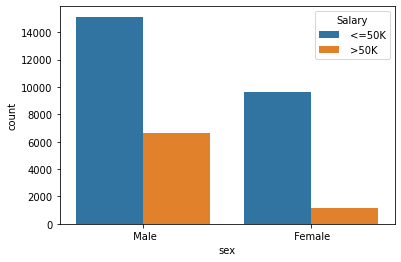

In [20]:
sns.countplot('sex',data=dataset1,hue='Salary')

from the above count plot we can clearly conlcude that the count of males are more than females whether the salary is <=50K or >50K
Less females and males are in the category of <=50K as compare to the category of >50K

#### Does marital status affect Salary status, lets see in the given count plot

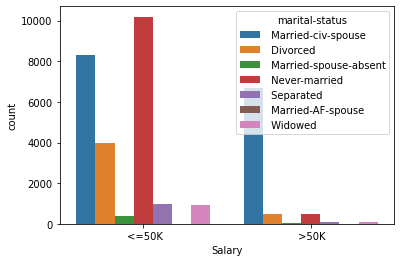

In [21]:
sns.countplot('Salary',hue='marital-status',data=dataset1)

We can clearly see in the above count plot that married-civ-spouse are more likely to earn >50K than others present in the category of >50K

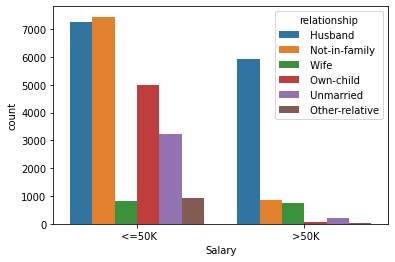

In [24]:
sns.countplot('Salary',hue='relationship',data=dataset1)

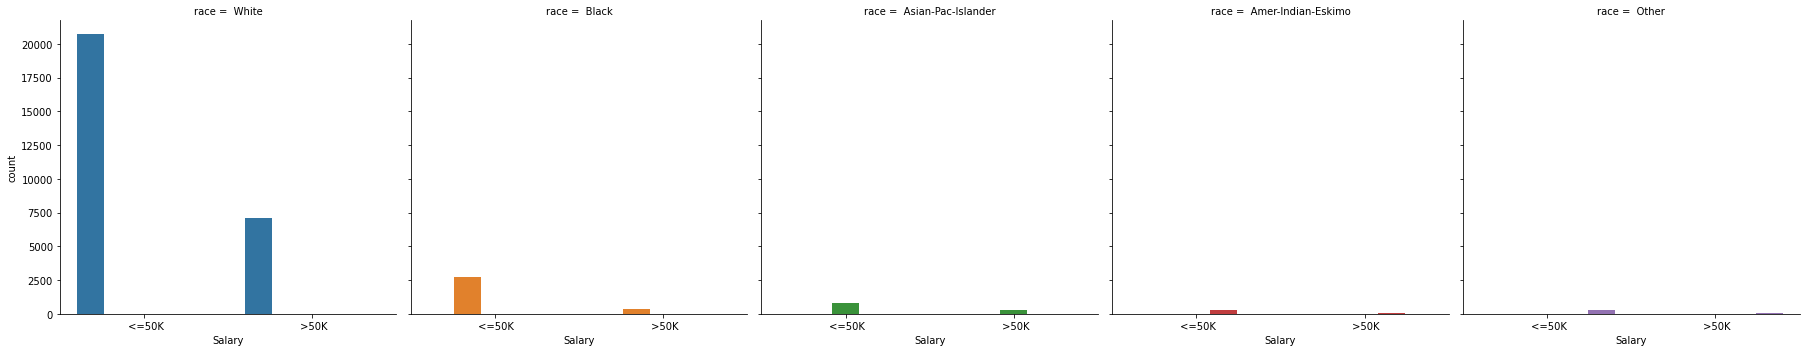

In [23]:
sns.catplot('Salary',hue='race',data=dataset1,kind='count',col='race')

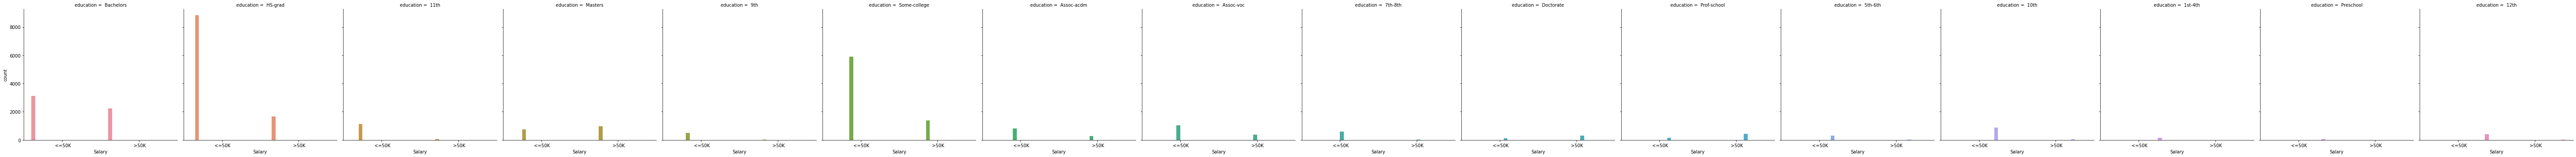

In [25]:
sns.catplot('Salary',hue='education',data=dataset1,kind='count',col='education' )

#### Checking correlation between the variables that have continuous values

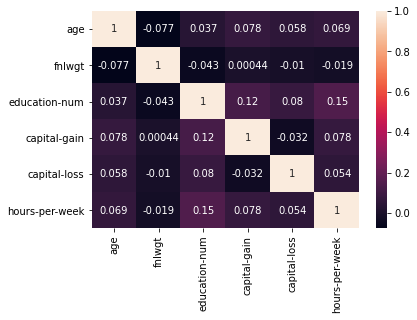

In [30]:
corr=dataset1.corr()
sns.heatmap(corr,annot=True)

#### Lets see box plot for hours-per-week to see if there any outliers present in the dataset 

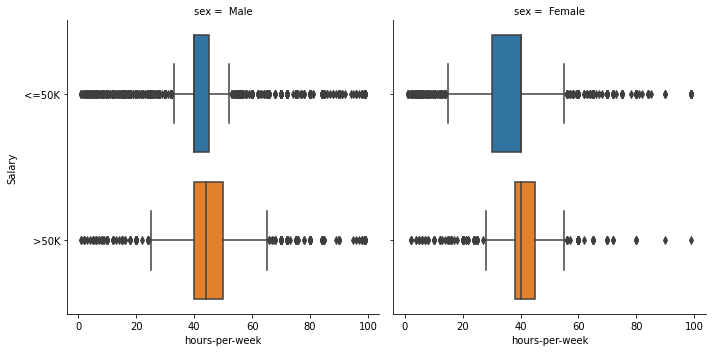

In [120]:
sns.catplot('hours-per-week','Salary',data=dataset1,kind='box',col='sex')

From the above box plot we can clearly see that there are lot of outliers are present.
So now we'll have to deal with the outliers



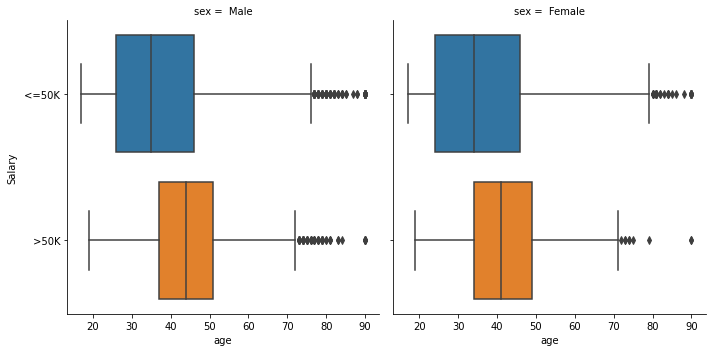

In [37]:
sns.catplot('age','Salary',data=dataset1,kind='box',col='sex')

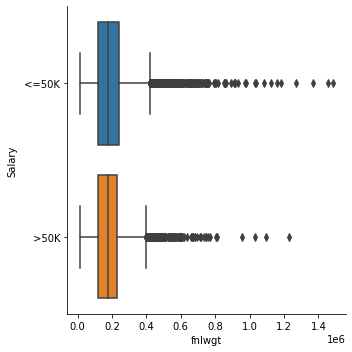

In [40]:
sns.catplot('fnlwgt','Salary',data=dataset1,kind='box',)

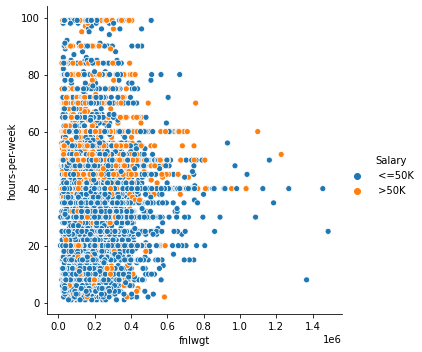

In [42]:
sns.relplot('fnlwgt','hours-per-week',hue='Salary',data=dataset1,kind='scatter')

##### Now copy dataset1 in data2 for Outliers detection and  feature scaling so that if we make any mistake than it wil not affect our dataset1

In [293]:
data2=dataset1.copy()
data2.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


##### Now we will select the columns that have numerical values and assign these into data3 for outliers detection

In [195]:
from scipy import stats
data3=data2.select_dtypes('int64')    # selecting columns those have numerical values
z=np.abs(stats.zscore(data3))         # Z-score 
print(z)               

[[0.83709708 1.0087417  1.13477863 0.14591373 0.21666301 2.22212013]
 [0.04264043 0.24504633 0.42002663 0.14591373 0.21666301 0.03542999]
 [1.05703146 0.42576955 1.19742926 0.14591373 0.21666301 0.03542999]
 ...
 [1.42358875 0.3588108  0.42002663 0.14591373 0.21666301 0.03542999]
 [1.21562378 0.11092744 0.42002663 0.14591373 0.21666301 1.65520046]
 [0.98372    0.92986178 0.42002663 1.88840054 0.21666301 0.03542999]]
       age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
9       37  280464             10             0             0              80
22      43  117037              7             0          2042              40
27      39  367260              9             0             0              80
31      45  386940             13             0          1408              40
36      19  544091              9             0             0              25
...    ...     ...            ...           ...           ...             ...
32510   25  514716             13 

In [294]:
print((np.where(z>3)))       # selecting z values greater than 3
print(data3[z>3])             # selecting data for which z>3 

(array([    9,    22,    27, ..., 32524, 32524, 32530]), array([5, 4, 5, ..., 0, 5, 5]))
       age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
9       37  280464             10             0             0              80
22      43  117037              7             0          2042              40
27      39  367260              9             0             0              80
31      45  386940             13             0          1408              40
36      19  544091              9             0             0              25
...    ...     ...            ...           ...           ...             ...
32510   25  514716             13             0             0              40
32517   57  110417              9         99999             0              40
32524   81  120478             11             0             0               1
32524   81  120478             11             0             0               1
32530   30   33811             13             0      

In [297]:
Q1 = data3.quantile(0.25)         # first quartile of data3
Q3 = data3.quantile(0.75)         # 3rd quartile of data3
IQR = Q3 - Q1                     # Finding Inter Quartile Range
print(IQR)                         
print(Q1)
print(Q3)

age                   20.0
fnlwgt            119223.0
education-num          3.0
capital-gain           0.0
capital-loss           0.0
hours-per-week         5.0
dtype: float64
age                   28.0
fnlwgt            117831.5
education-num          9.0
capital-gain           0.0
capital-loss           0.0
hours-per-week        40.0
Name: 0.25, dtype: float64
age                   48.0
fnlwgt            237054.5
education-num         12.0
capital-gain           0.0
capital-loss           0.0
hours-per-week        45.0
Name: 0.75, dtype: float64


In [298]:
((data3<(Q1-IQR*1.5)) | (data3>(Q3+1.5*IQR))).sum()      # Counting Outliers In each columns those have numerical values 

age                143
fnlwgt             992
education-num     1198
capital-gain      2711
capital-loss      1519
hours-per-week    9008
dtype: int64

##### We can use the given code below to replace the ouliers but I didn't do that in this project because I didn't find it useful.

In [218]:
##data2['capital-gain'].loc[data2['capital-gain']<Q1['capital-gain']-1.5*IQR['capital-gain']]=data3['capital-gain'].quantile(0.5)
#data2['capital-gain'].loc[data2['capital-gain']>Q3['capital-gain']+1.5*IQR['capital-gain']]=data3['capital-gain'].quantile(0.95)
#data2['capital-loss'].loc[data2['capital-loss']<Q1['capital-loss']-1.5*IQR['capital-loss']]=data3['capital-loss'].quantile(0.5)
#data2['capital-loss'].loc[data2['capital-loss']>Q3['capital-loss']+1.5*IQR['capital-loss']]=data3['capital-loss'].quantile(0.95)
#data2['hours-per-week'].loc[data2['hours-per-week']<Q1['hours-per-week']-1.5*IQR['hours-per-week']]=data3['hours-per-week'].quantile(0.5)
#data2['hours-per-week'].loc[data2['hours-per-week']>Q3['hours-per-week']+1.5*IQR['hours-per-week']]=data3['hours-per-week'].quantile(0.95)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


##### Now we'll perform feature scaling on data2 using data3

In [201]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32560 non-null  int64  
 1   workclass       32560 non-null  object 
 2   fnlwgt          32560 non-null  int64  
 3   education       32560 non-null  object 
 4   education-num   32560 non-null  int64  
 5   marital-status  32560 non-null  object 
 6   occupation      32560 non-null  object 
 7   relationship    32560 non-null  object 
 8   race            32560 non-null  object 
 9   sex             32560 non-null  object 
 10  capital-gain    32560 non-null  float64
 11  capital-loss    32560 non-null  float64
 12  hours-per-week  32560 non-null  float64
 13  native-country  32560 non-null  object 
 14  Salary          32560 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 3.7+ MB


##### Here min-max scaling has performed on data2 

In [262]:
for i in data3.columns.tolist():
  data2[i]=(data2[i]-data2[i].min())/(data2[i].max()-data2[i].min())

In [263]:
data2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,<=50K
1,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K
2,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
3,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K
4,0.273973,Private,0.184932,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.0,0.397959,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.136986,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States,<=50K
32556,0.315068,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
32557,0.561644,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,<=50K
32558,0.068493,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States,<=50K


##### In the dataset above all the numerical values are scaled now.

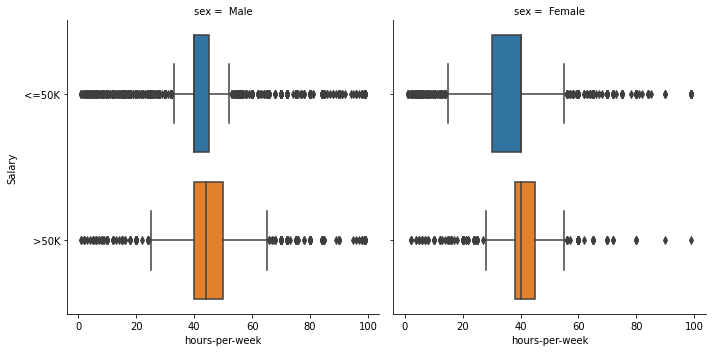

In [299]:
sns.catplot('hours-per-week','Salary',data=data2,kind='box',col='sex')

#### Extracting Features and labels 

In [264]:
y=data2.loc[:,'Salary']
X=data2.loc[:,[col for col in data2.columns.tolist() if col!='Salary']]
print(X.columns)
y

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')


0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: Salary, Length: 32560, dtype: object

#### Now we'll use pd.get_dummies() to create the sparse matrix for the categorical variables

In [265]:
X=pd.get_dummies(X)
print(X.shape)
X

(32560, 105)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,...,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.452055,0.048238,0.800000,0.000000,0.0,0.122449,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.287671,0.138113,0.533333,0.000000,0.0,0.397959,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.493151,0.151068,0.400000,0.000000,0.0,0.397959,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.150685,0.221488,0.800000,0.000000,0.0,0.397959,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.273973,0.184932,0.866667,0.000000,0.0,0.397959,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.136986,0.166404,0.733333,0.000000,0.0,0.377551,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32556,0.315068,0.096500,0.533333,0.000000,0.0,0.397959,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,0.561644,0.094827,0.533333,0.000000,0.0,0.397959,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,0.068493,0.128499,0.533333,0.000000,0.0,0.193878,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [266]:
np.unique(y)

array([' <=50K', ' >50K'], dtype=object)

##### Here map function is used to encode ' <50K' as 0 and ' >50K' as 1

In [267]:
y=y.map({' <=50K':0,' >50K':1})
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Salary, Length: 32560, dtype: int64


##### train_test_split to split the X and y into train and test set 

In [268]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=46)

##### Shape of each set

In [269]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22792, 105)
(22792,)
(9768, 105)
(9768,)


#### Creating Logistic Regression model 

In [270]:
from sklearn.linear_model import LogisticRegression
lg_clf=LogisticRegression()
lg_clf.fit(X_train,y_train)       # Fitting model on X_train,y_train

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### Predicting values on X_test

In [271]:
y_pred=lg_clf.predict(X_test)

#### Performance evaluation

In [272]:
from sklearn.metrics import confusion_matrix,accuracy_score,explained_variance_score
print(confusion_matrix(y_test,y_pred))

[[6836  537]
 [ 978 1417]]


In [302]:
print('Accuracy of logistic regression  model ',accuracy_score(y_test,y_pred))

Accuracy of logistic regression  model  0.8449017199017199


#### Lets create a DecisionTreeClassifier and evaluate the performs on the given dataset 

In [289]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(max_depth=8)
dt_clf.fit(X_train,y_train)                             # fitting model on X_train,y_train

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [292]:
y_pred1=dt_clf.predict(X_test)         # Predicting value on X_test
confusion_matrix(y_test,y_pred1)       # Confusion matrix

array([[6989,  384],
       [1061, 1334]])

In [291]:
accuracy_score(y_test,y_pred1)          # Accuracy Score

0.8520679770679771